# Regression Metrics

During the course of this notebook, you will calculate MSE and $R^2$ metrics for a linear regression model.

In [1]:
from sklearn.datasets import load_linnerud
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
linnerud = load_linnerud()
print(linnerud.keys())
print(linnerud.data.shape)
print(len(linnerud.feature_names))
print(linnerud.target.shape)
print(len(linnerud.target_names))

# The linnerud dataset is a classic example of multivariate regression. In this case, both the features (X) and the target (y) are multivariable.
# The goal is to predict these three target variables based on the input features (Chins, Situps, and Jumps).
# Multivariate Regression: Trying to predict multiple continuous target variables (Weight, Waist, and Pulse) from multiple input features (Chins, Situps, and Jumps).

dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])
(20, 3)
3
(20, 3)
3


## Dataset Setup

In the cell below, we load the Linnerud dataset ([documentation here](https://scikit-learn.org/stable/datasets/toy_dataset.html#linnerrud-dataset)), a toy dataset from scikit-learn containing exercise and physiological data points.

In [3]:
features = pd.DataFrame(data=linnerud.data, columns=linnerud.feature_names)
targets = pd.DataFrame(data=linnerud.target, columns=linnerud.target_names)

In [4]:
print(features.head())

   Chins  Situps  Jumps
0    5.0   162.0   60.0
1    2.0   110.0   60.0
2   12.0   101.0  101.0
3   12.0   105.0   37.0
4   13.0   155.0   58.0


In [5]:
print(targets.head())

   Weight  Waist  Pulse
0   191.0   36.0   50.0
1   189.0   37.0   52.0
2   193.0   38.0   58.0
3   162.0   35.0   62.0
4   189.0   35.0   46.0


In [8]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
dtypes: float64(3)
memory usage: 608.0 bytes
None


In [7]:
print(targets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  20 non-null     float64
 1   Waist   20 non-null     float64
 2   Pulse   20 non-null     float64
dtypes: float64(3)
memory usage: 608.0 bytes
None


In [9]:
print(features.describe())

           Chins      Situps      Jumps
count  20.000000   20.000000   20.00000
mean    9.450000  145.550000   70.30000
std     5.286278   62.566575   51.27747
min     1.000000   50.000000   25.00000
25%     4.750000  101.000000   39.50000
50%    11.500000  122.500000   54.00000
75%    13.250000  210.000000   85.25000
max    17.000000  251.000000  250.00000


In [10]:
print(targets.describe())

           Weight      Waist      Pulse
count   20.000000  20.000000  20.000000
mean   178.600000  35.400000  56.100000
std     24.690505   3.201973   7.210373
min    138.000000  31.000000  46.000000
25%    160.750000  33.000000  51.500000
50%    176.000000  35.000000  55.000000
75%    191.500000  37.000000  60.500000
max    247.000000  46.000000  74.000000


In [11]:
targets["Weight"]

0     191.0
1     189.0
2     193.0
3     162.0
4     189.0
5     182.0
6     211.0
7     167.0
8     176.0
9     154.0
10    169.0
11    166.0
12    154.0
13    247.0
14    193.0
15    202.0
16    176.0
17    157.0
18    156.0
19    138.0
Name: Weight, dtype: float64

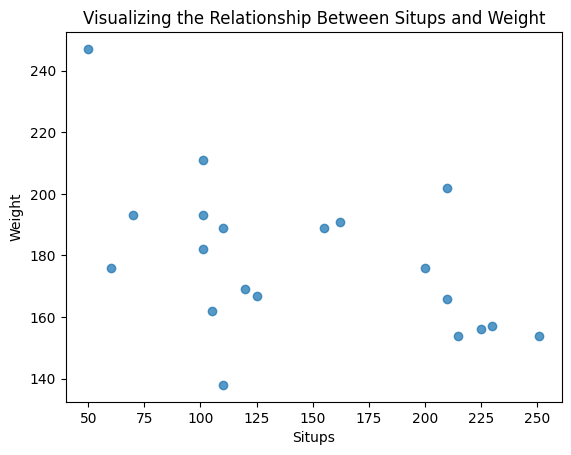

In [13]:
# Visualize the relationship using a scatterplot

fig, ax = plt.subplots()
ax.scatter(features["Situps"], targets["Weight"], alpha=0.75)
ax.set_title("Visualizing the Relationship Between Situps and Weight")
ax.set_xlabel("Situps")
ax.set_ylabel("Weight");

## Training a Regressor

Next, we train a linear regression model ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) using our `features` and `targets['Weight']` data.

In [14]:
reg = LinearRegression().fit(features, targets['Weight'])

## Your Task: Calculate Regression Metrics

Generate predictions, then calculate the following regression metrics:

1. MSE ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html))
2. $R^2$ ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html))

In [15]:
# TODO: get predictions for features
pred=reg.predict(features)

In [16]:
# TODO: import MSE metric
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(targets['Weight'],pred)
print(f'The MSE of weight prediction:{mse}')
# TODO: calculate MSE for predictions


The MSE of weight prediction:423.97735005907754


In [17]:
# TODO: import r2 metric
from sklearn.metrics import r2_score
r2=r2_score(targets['Weight'],pred)
print(f'The R^2 of weight prediction:{r2}')

# TODO: calculate r2 for predictions


The R^2 of weight prediction:0.2679190695529966


In [18]:
reg = LinearRegression().fit(features, targets)

In [19]:
pred=reg.predict(features)

In [20]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(targets,pred)
print(f'The MSE of all predictions:{mse}')

The MSE of all predictions:158.02449131557572


In [21]:
from sklearn.metrics import r2_score
r2=r2_score(targets,pred)
print(f'The R^2 of all predictions:{r2}')

The R^2 of all predictions:0.2968779120881459


In [22]:
pred.shape

(20, 3)

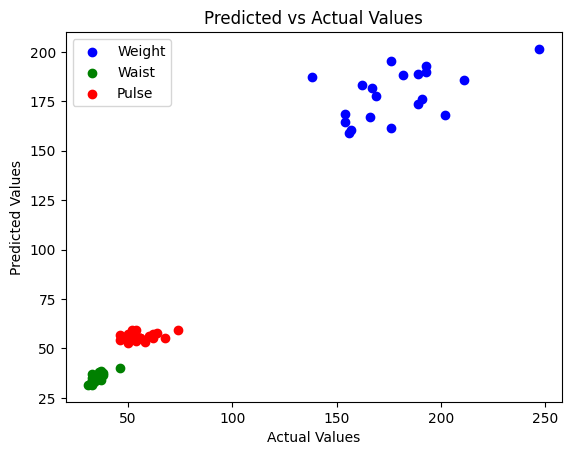

In [23]:
plt.figure
plt.scatter(targets['Weight'],pred[:,0],color='blue', label='Weight')
plt.scatter(targets['Waist'],pred[:,1],color='green', label='Waist')
plt.scatter(targets['Pulse'],pred[:,2],color='red', label='Pulse')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")

plt.legend();

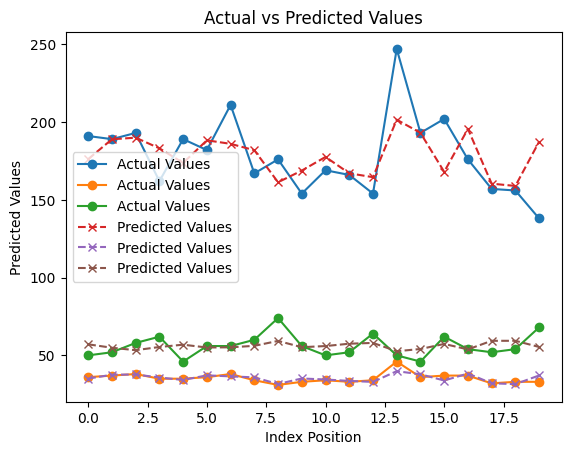

In [24]:
plt.figure
plt.plot(targets,label='Actual Values', linestyle='-', marker='o')
plt.plot(pred, label='Predicted Values', linestyle='--', marker='x')

plt.xlabel('Index Position')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend();